# People Analytics

The dataset can be obtained on Kaggle through this [Employee Dataset link](https://www.kaggle.com/datasets/ravindrasinghrana/employeedataset). The dataset is a fabricated dataset designed for the purpose of experimenting with different data analysis and machine learning approaches in the field of human resources and employee management. While this dataset mimics the format and attributes of genuine employee data, it's important to note that all the information it contains is entirely fictional and has been generated for demonstration purposes only.

Descriptions for each of the columns in the dataset:
- Employee ID: Unique identifier for each employee in the organization.
- First Name: The first name of the employee.
- Last Name: The last name of the employee.
- Start Date: The date when the employee started working for the organization.
- Exit Date: The date when the employee left or exited the organization (if applicable).
- Title: The job title or position of the employee within the organization.
- Supervisor: The name of the employee's immediate supervisor or manager.
- Email: The email address associated with the employee's communication within the organization.
- Business Unit: The specific business unit or department to which the employee belongs.
- Employee Status: The current employment status of the employee (e.g., Active, On Leave, Terminated).
- Employee Type: The type of employment the employee has (e.g., Full-time, Part-time, Contract).
- Pay Zone: The pay zone or salary band to which the employee's compensation falls.
- Employee Classification Type: The classification type of the employee (e.g., Exempt, Non-exempt).
- Termination Type: The type of termination if the employee has left the organization (e.g., Resignation, Layoff, Retirement).
- Termination Description: Additional details or reasons for the employee's termination (if applicable).
- Department Type: The broader category or type of department the employee's work is associated with.
- Division Description: The division or branch of the organization where the employee works.
- DOB (Date of Birth): The date of birth of the employee.
- State: The state or region where the employee is located.
- Job Function: A brief description of the employee's primary job function or role.
- Gender: A code representing the gender of the employee (e.g., M for Male, F for Female, N for Non-binary).
- Location: A code representing the physical location or office where the employee is based.
- Race (or) Ethnicity: A description of the employee's racial or ethnic background (if provided).
- Marital Status: The marital status of the employee (e.g., Single, Married, Divorced).
- Performance Score: A score indicating the employee's performance level (e.g., Excellent, Satisfactory, Needs Improvement).
- Current Employee Rating: The current rating or evaluation of the employee's overall performance.

# Working Area

## Import Library and Data

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
employee = pd.read_csv('/content/employee_data.csv')

## Data Preprocessing

In [ ]:
# Check the rows and columns of employee data
employee.head()

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3


In [ ]:
# Check DataFrame information
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EmpID                       3000 non-null   int64 
 1   FirstName                   3000 non-null   object
 2   LastName                    3000 non-null   object
 3   StartDate                   3000 non-null   object
 4   ExitDate                    1533 non-null   object
 5   Title                       3000 non-null   object
 6   Supervisor                  3000 non-null   object
 7   ADEmail                     3000 non-null   object
 8   BusinessUnit                3000 non-null   object
 9   EmployeeStatus              3000 non-null   object
 10  EmployeeType                3000 non-null   object
 11  PayZone                     3000 non-null   object
 12  EmployeeClassificationType  3000 non-null   object
 13  TerminationType             3000 non-null   obje

In [ ]:
# Number of unique values in each column
employee.nunique()

EmpID                         3000
FirstName                     1597
LastName                      1137
StartDate                     1496
ExitDate                       820
Title                           32
Supervisor                    2952
ADEmail                       2998
BusinessUnit                    10
EmployeeStatus                   5
EmployeeType                     3
PayZone                          3
EmployeeClassificationType       3
TerminationType                  5
TerminationDescription        1533
DepartmentType                   6
Division                        25
DOB                           2800
State                           28
JobFunctionDescription          83
GenderCode                       2
LocationCode                  2821
RaceDesc                         5
MaritalDesc                      4
Performance Score                4
Current Employee Rating          5
dtype: int64

In [ ]:
# Check duplicated value
employee.duplicated().sum()

0

In [ ]:
# Check the column that has <= 32 unique values
for col in employee:
  if len(employee[col].value_counts()) <= 32:
    print(f'Column: ', col, '\nUnique Values: ', employee[col].sort_values().unique(), '\n_____________________________________')

Column:  Title 
Unique Values:  ['Accountant I' 'Administrative Assistant' 'Area Sales Manager'
 'BI Developer' 'BI Director' 'CIO' 'Data Analyst' 'Data Analyst '
 'Data Architect' 'Database Administrator' 'Director of Operations'
 'Director of Sales' 'Enterprise Architect' 'IT Director'
 'IT Manager - DB' 'IT Manager - Infra' 'IT Manager - Support'
 'IT Support' 'Network Engineer' 'President & CEO'
 'Principal Data Architect' 'Production Manager' 'Production Technician I'
 'Production Technician II' 'Sales Manager' 'Senior BI Developer'
 'Shared Services Manager' 'Software Engineer'
 'Software Engineering Manager' 'Sr. Accountant' 'Sr. DBA'
 'Sr. Network Engineer'] 
_____________________________________
Column:  BusinessUnit 
Unique Values:  ['BPC' 'CCDR' 'EW' 'MSC' 'NEL' 'PL' 'PYZ' 'SVG' 'TNS' 'WBL'] 
_____________________________________
Column:  EmployeeStatus 
Unique Values:  ['Active' 'Future Start' 'Leave of Absence' 'Terminated for Cause'
 'Voluntarily Terminated'] 
___________

On `Title` column, there are exactly the same values but being recorded differently because of white space issue. Also for the `DepartmentType`, but we only delete the white space here

In [ ]:
#Delete the white space for department type
employee['DepartmentType'] = employee['DepartmentType'].str.rstrip()

In [ ]:
# Delete the white space for title
employee['Title'] = employee['Title'].str.rstrip()

In [ ]:
# Check the unique values again
employee['Title'].sort_values().unique()

array(['Accountant I', 'Administrative Assistant', 'Area Sales Manager',
       'BI Developer', 'BI Director', 'CIO', 'Data Analyst',
       'Data Architect', 'Database Administrator',
       'Director of Operations', 'Director of Sales',
       'Enterprise Architect', 'IT Director', 'IT Manager - DB',
       'IT Manager - Infra', 'IT Manager - Support', 'IT Support',
       'Network Engineer', 'President & CEO', 'Principal Data Architect',
       'Production Manager', 'Production Technician I',
       'Production Technician II', 'Sales Manager', 'Senior BI Developer',
       'Shared Services Manager', 'Software Engineer',
       'Software Engineering Manager', 'Sr. Accountant', 'Sr. DBA',
       'Sr. Network Engineer'], dtype=object)

Change the **objected-date** columns into datetime

In [ ]:
# Change DOB, StartDate, ExitDate type to date
employee['DOB'] = pd.to_datetime(employee['DOB'])
employee['StartDate'] = pd.to_datetime(employee['StartDate'])
employee['ExitDate'] = pd.to_datetime(employee['ExitDate'])

<ipython-input-11-2ba8b7cda96f>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  employee['DOB'] = pd.to_datetime(employee['DOB'])


In [ ]:
# Check the types
employee[['StartDate','ExitDate','DOB']].dtypes

StartDate    datetime64[ns]
ExitDate     datetime64[ns]
DOB          datetime64[ns]
dtype: object

In [ ]:
# See the basic statistic of the data
employee.describe()

,EmpID,LocationCode,Current Employee Rating
count,3000.000000,3000.000000,3000.000000
mean,2500.500000,44997.180667,2.969000
std,866.169729,29987.331783,1.015078
min,1001.000000,1013.000000,1.000000
25%,1750.750000,17546.000000,2.000000
50%,2500.500000,44150.500000,3.000000
75%,3250.250000,71481.250000,3.000000
max,4000.000000,98052.000000,5.000000


In [ ]:
employee.describe(include=[object]).T

,count,unique,top,freq
FirstName,3000,1597,Harley,9
LastName,3000,1137,Preston,10
Title,3000,31,Production Technician I,1321
Supervisor,3000,2952,John Smith,3
ADEmail,3000,2998,larissa.warner@bilearner.com,2
BusinessUnit,3000,10,NEL,304
EmployeeStatus,3000,5,Active,2458
EmployeeType,3000,3,Full-Time,1038
PayZone,3000,3,Zone A,1062
EmployeeClassificationType,3000,3,Temporary,1033


In [ ]:
employee[employee['ADEmail'].duplicated()]

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
1742,2169,Larissa,Warner,2020-07-04,2022-05-11,Production Technician II,Sarah Harrison,larissa.warner@bilearner.com,MSC,Active,...,General - Con,1995-12-26,MA,Flagger,Female,81396,Black,Widowed,Exceeds,3
2204,2631,Darien,Young,2021-03-03,NaT,Area Sales Manager,Maria Hale,darien.young@bilearner.com,MSC,Active,...,Catv,1998-09-04,ID,Foreman,Female,50389,Black,Widowed,Fully Meets,2


In [ ]:
# Inspect people with the same email
employee[employee['ADEmail']=='darien.young@bilearner.com'][['EmployeeStatus','DOB','StartDate','ExitDate','ADEmail','TerminationType', 'TerminationDescription']]

,EmployeeStatus,DOB,StartDate,ExitDate,ADEmail,TerminationType,TerminationDescription
1974,Terminated for Cause,1945-09-23,2022-11-09,2023-01-10,darien.young@bilearner.com,Resignation,Sit energy consider voice director.
2204,Active,1998-09-04,2021-03-03,NaT,darien.young@bilearner.com,Unk,NaN


In [ ]:
# Inspect people with the same email
employee[employee['ADEmail']=='larissa.warner@bilearner.com'][['EmployeeStatus','DOB','StartDate','ExitDate','ADEmail','TerminationType', 'TerminationDescription']]

,EmployeeStatus,DOB,StartDate,ExitDate,ADEmail,TerminationType,TerminationDescription
865,Active,1943-06-27,2018-10-27,NaT,larissa.warner@bilearner.com,Unk,NaN
1742,Active,1995-12-26,2020-07-04,2022-05-11,larissa.warner@bilearner.com,Retirement,Method suggest leave process deep tough seek.


It's become a problem if employees have the same email and still have an active status. The company need to do a real-time validation when new employees register their emails. Employees, need to ask to related department if not-only-once unknown email is being delivered to them

To support analysis, column `Age` and `Tenure` will be added to the dataframe

In [ ]:
# Add Age to the dataframe
date_now = datetime.now()
employee['Age'] = (date_now - employee['DOB']).astype('<m8[Y]')

In [ ]:
# Calculate tenure including weekends
def calculate_tenure(start_date, exit_date):
    days = (exit_date - start_date).days
    return days

In [ ]:
# Apply tenure column to the dataset
employee['Tenure'] = employee.apply(lambda row: calculate_tenure(row['StartDate'], row['ExitDate']), axis=1)
employee.sample(10)

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Age,Tenure
1834,2261,Samuel,Jennings,2022-06-01,NaT,IT Support,Gregory Brown,samuel.jennings@bilearner.com,MSC,Active,...,CT,Foreman,Female,24054,Black,Divorced,Fully Meets,2,65.0,NaN
2329,2756,Earnest,Hankard,2021-05-05,NaT,Production Technician II,David Miller,earnest.hankard@bilearner.com,TNS,Active,...,MA,Driller,Male,2155,White,Divorced,Fully Meets,2,37.0,NaN
2018,2445,Avery,Koch,2019-12-30,NaT,Production Manager,Kelly Mercer,avery.koch@bilearner.com,MSC,Active,...,MA,Technician,Female,55950,Asian,Widowed,Fully Meets,2,53.0,NaN
2688,3115,Braiden,Kirby,2021-07-12,2021-08-17,Production Technician II,Paul Brewer,braiden.kirby@bilearner.com,WBL,Active,...,MA,Supervisor,Female,10137,Hispanic,Divorced,Fully Meets,4,59.0,36.0
2344,2771,Tia,Potter,2020-07-08,2021-09-24,Production Technician I,Tonya Moreno,tia.potter@bilearner.com,BPC,Terminated for Cause,...,MA,Laborer,Male,37659,Other,Divorced,Fully Meets,5,72.0,443.0
2230,2657,Trace,Brandt,2021-11-23,2022-07-20,Area Sales Manager,Jeffrey Hodge,trace.brandt@bilearner.com,BPC,Active,...,AZ,Manager,Male,27097,White,Widowed,Fully Meets,2,28.0,239.0
2170,2597,Layla,Kane,2020-04-03,NaT,Area Sales Manager,Mrs. Deanna Cooper,layla.kane@bilearner.com,NEL,Active,...,ID,Technician,Male,92704,Asian,Divorced,Fully Meets,2,78.0,NaN
1893,2320,Kristen,Peters,2022-10-26,2023-06-17,Production Manager,David Powers,kristen.peters@bilearner.com,PYZ,Voluntarily Terminated,...,MA,Engineer,Female,64961,White,Single,Fully Meets,4,59.0,234.0
2780,3207,Lynn,O'hare,2022-03-27,NaT,Production Technician I,Maria Nelson,lynn.o'hare@bilearner.com,PYZ,Active,...,MA,Supervisor,Female,2152,White,Widowed,Fully Meets,5,42.0,NaN
1920,2347,Karley,Novak,2019-10-25,NaT,President & CEO,Jesus Smith,karley.novak@bilearner.com,SVG,Active,...,MA,Laborer,Female,14720,White,Single,Fully Meets,1,46.0,NaN


## Exploratory Data Analysis

#### Descriptive and Performance Analysis

In [ ]:
# See the basic statistic on numerical data
employee.describe()

,EmpID,LocationCode,Current Employee Rating,Age,Tenure
count,3000.000000,3000.000000,3000.000000,3000.000000,1533.000000
mean,2500.500000,44997.180667,2.969000,51.517667,488.121331
std,866.169729,29987.331783,1.015078,17.688583,405.430582
min,1001.000000,1013.000000,1.000000,21.000000,0.000000
25%,1750.750000,17546.000000,2.000000,36.000000,152.000000
50%,2500.500000,44150.500000,3.000000,51.000000,391.000000
75%,3250.250000,71481.250000,3.000000,67.000000,743.000000
max,4000.000000,98052.000000,5.000000,82.000000,1807.000000


##### 1. What is the distribution of employees basic demographic information?

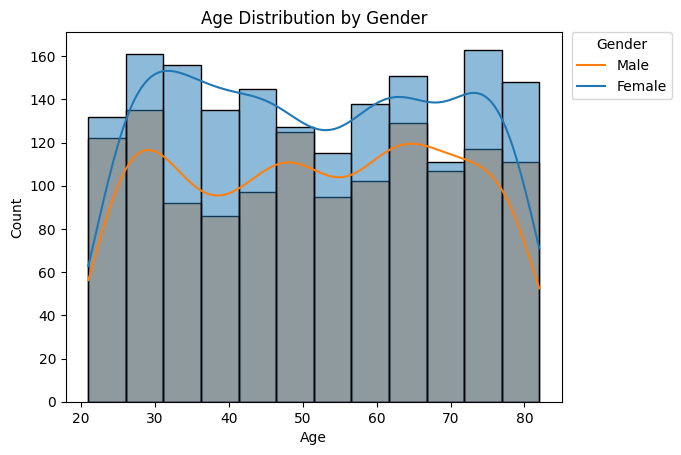

In [ ]:
sns.histplot(data=employee, x='Age', bins=12, hue='GenderCode', kde=True)
plt.title('Age Distribution by Gender')
plt.legend(title='Gender', loc=2, labels=['Male', 'Female'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

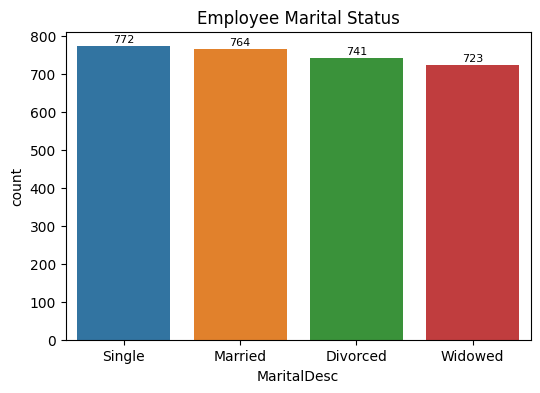

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=employee, x='MaritalDesc', order=employee['MaritalDesc'].value_counts().index)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Employee Marital Status')
plt.show()

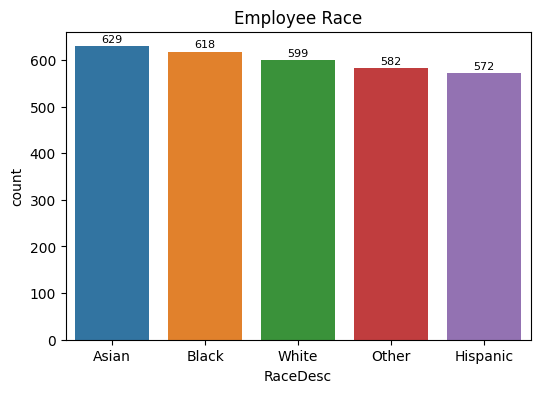

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=employee, x='RaceDesc', order=employee['RaceDesc'].value_counts().index)

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Employee Race')
plt.show()

If we look at the first graph, we can see the number of Females is higher than Males. Then, the distribution is slightly similar among ages, marital statuses, and races.

##### 2. What is the headcount in each department?

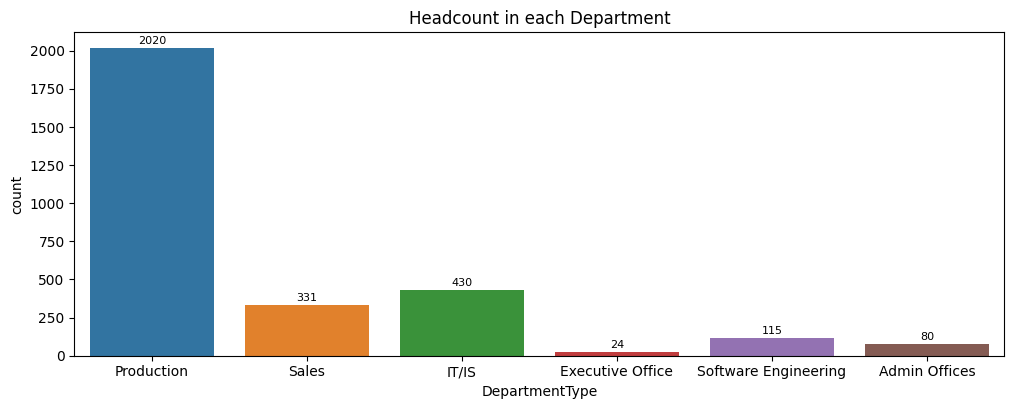

In [ ]:
plt.figure(figsize=(12,4.2))
sns.countplot(data=employee, x='DepartmentType')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Headcount in each Department')
plt.show()

##### 3. What are the top 10 job titles in terms of employee count?

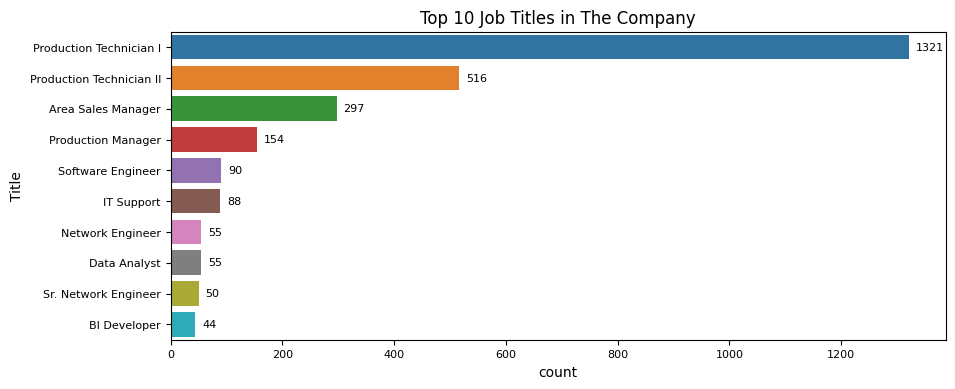

In [ ]:
plt.figure(figsize=(10,4))
plt.xticks(size=8)
plt.yticks(size=8)
sns.countplot(data=employee, y='Title', order=employee['Title'].value_counts().index[:10])

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.), \
                ha='left', va='center', fontsize=8, color='black', xytext=(5, 0), textcoords='offset points')

plt.title('Top 10 Job Titles in The Company')
plt.show()

##### 4. What is the headcount in each employment classification type and employee status?

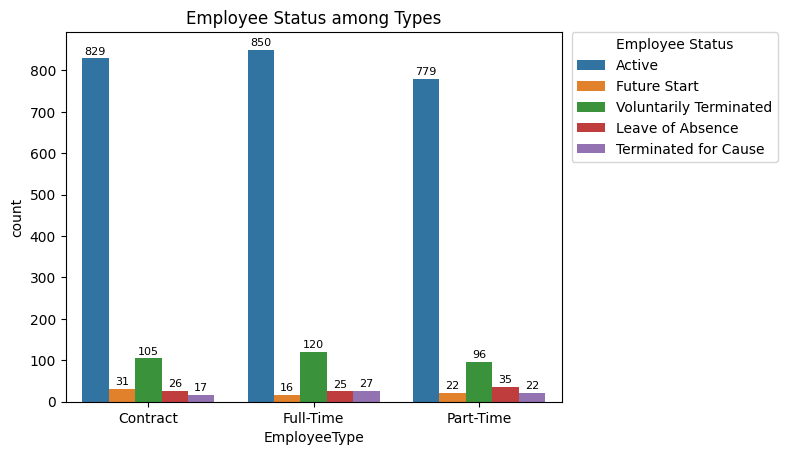

In [ ]:
sns.countplot(employee, x='EmployeeType', hue='EmployeeStatus')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Employee Status among Types')
plt.legend(title='Employee Status', loc=2, labels=['Active', 'Future Start', 'Voluntarily Terminated', 'Leave of Absence', 'Terminated for Cause'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

On all employee classifications, there are 2458 active employees, 387 employees who have been terminated (both voluntarily or involuntarily), and 69 will start soon.

##### 5. How is the performance between active employees and terminated employees?

In [ ]:
# Filter dataframe for active and terminated employee only
emp_active_terminated = (employee[(employee['EmployeeStatus']=='Active') | (employee['EmployeeStatus']=='Voluntarily Terminated') | (employee['EmployeeStatus']=='Terminated for Cause')])

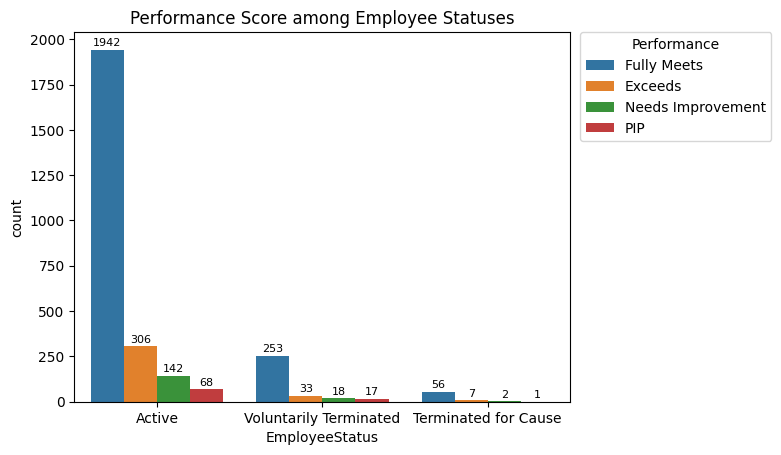

In [ ]:
# Create count plot to see the performance among employee statuses
sns.countplot(emp_active_terminated, x='EmployeeStatus', hue='Performance Score')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Performance Score among Employee Statuses')
plt.legend(title='Performance', loc=2, labels=['Fully Meets', 'Exceeds', 'Needs Improvement', 'PIP'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

On all statuses, most employees were scored **Fully Meets**, but this is not clear enough. So, `Current Employee Rating` will be used to see the average rating or evaluation of all employee's performance score

##### 6. What is the average employee rating on each employment status and performance classification?

In [ ]:
rating_pivot = emp_active_terminated.pivot_table(columns='EmployeeStatus', values='Current Employee Rating', index='EmployeeClassificationType', aggfunc='mean', margins=True)
rating_pivot.style.background_gradient()

EmployeeStatus,Active,Terminated for Cause,Voluntarily Terminated,All
EmployeeClassificationType,,,,
Full-Time,2.967857,2.791667,3.019608,2.968944
Part-Time,3.016688,3.600000,3.095238,3.035595
Temporary,2.897497,3.074074,3.087719,2.924490
All,2.959317,3.090909,3.068536,2.974692


Overall, the average employee performance rating is **2.9 out of 5.0**, which is —we can say, met the company expectations. However, active employees have slightly lower scores compared to other groups.

##### 7. What are the average tenure of employees on each employment status and classification?

In [ ]:
tenure_pivot = emp_active_terminated.pivot_table(index='EmployeeClassificationType', values='Tenure', columns='EmployeeStatus', aggfunc='mean', margins=True)
tenure_pivot.style.background_gradient()

EmployeeStatus,Active,Terminated for Cause,Voluntarily Terminated,All
EmployeeClassificationType,,,,
Full-Time,509.193353,534.083333,545.098039,518.514223
Part-Time,478.394040,293.800000,478.647619,471.895735
Temporary,439.377095,549.000000,550.017544,470.585170
All,474.586276,485.575758,525.109034,486.881713


Both involuntarily/voluntarily terminated employee have an average tenure about **505 days** or about **a year and a quarter** before they leave. Looking back the employees' ratings, they tend to have higher ratings compared to active employees. Many factors may contribute to the progress of employees' performance before they leave. Such as, the company's training and development programs, company's culture, bonuses, and more. However, it's crucial to the company to assess its employee retention and turnover, **are they good or bad?**

### Attrition and Retention Analysis

##### Build Dataset and Metrics

In [ ]:
# Make dataset that counts active employee each year
emp_active = employee[(employee['EmployeeStatus'].str.contains('Active') | (employee['EmployeeStatus'].str.contains('Future')))]
emp_active = emp_active['StartDate'].dt.year.value_counts()
emp_active = pd.DataFrame(emp_active).reset_index()
emp_active = emp_active.rename(columns={'index':'Year','StartDate':'Active Employee'}).sort_values(by='Year').reset_index()
emp_active = emp_active.drop('index', axis=1)
emp_active

,Year,Active Employee
0,2018,212
1,2019,486
2,2020,505
3,2021,503
4,2022,525
5,2023,296


In [ ]:
# Make dataset that counts terminated employee each year
emp_left = employee[employee['EmployeeStatus'].str.contains('Terminated')]
emp_left = emp_left['StartDate'].dt.year.value_counts()
emp_left = pd.DataFrame(emp_left).reset_index()
emp_left = emp_left.rename(columns={'index':'Year','StartDate':'Terminated Employee'})
emp_left

,Year,Terminated Employee
0,2019,89
1,2022,79
2,2021,78
3,2020,70
4,2018,40
5,2023,31


In [ ]:
# Merge both datasets
emp_atre = emp_active.merge(emp_left, on='Year')
emp_atre = emp_atre.rename(columns={'Active Employee':'New Employee'})
emp_atre = emp_atre.sort_values(by='Year')
emp_atre = emp_atre.reset_index()
emp_atre = emp_atre.drop(columns='index', axis=1)
emp_atre

,Year,New Employee,Terminated Employee
0,2018,212,40
1,2019,486,89
2,2020,505,70
3,2021,503,78
4,2022,525,79
5,2023,296,31


In [ ]:
# Calculate cumulative sums for "New Employee" and "Terminated Employee" columns
emp_atre['Employee Start'] = emp_atre['New Employee'].cumsum()
emp_atre['Employee End'] = (emp_atre['Employee Start'] - emp_atre['Terminated Employee']).clip(lower=0)

# Display the DataFrame
emp_atre

,Year,New Employee,Terminated Employee,Employee Start,Employee End
0,2018,212,40,212,172
1,2019,486,89,698,609
2,2020,505,70,1203,1133
3,2021,503,78,1706,1628
4,2022,525,79,2231,2152
5,2023,296,31,2527,2496


In [ ]:
# Build Attrition and Retention Rate metrics
emp_atre['Attrition Rate'] = round((emp_atre['Terminated Employee']) / ((emp_atre['Employee Start'] + emp_atre['Employee End'])/2) * 100,2)
emp_atre['Retention Rate'] = round((emp_atre['Employee End']) / emp_atre['Employee Start'] * 100,2)

emp_atre

,Year,New Employee,Terminated Employee,Employee Start,Employee End,Attrition Rate,Retention Rate
0,2018,212,40,212,172,20.83,81.13
1,2019,486,89,698,609,13.62,87.25
2,2020,505,70,1203,1133,5.99,94.18
3,2021,503,78,1706,1628,4.68,95.43
4,2022,525,79,2231,2152,3.60,96.46
5,2023,296,31,2527,2496,1.23,98.77


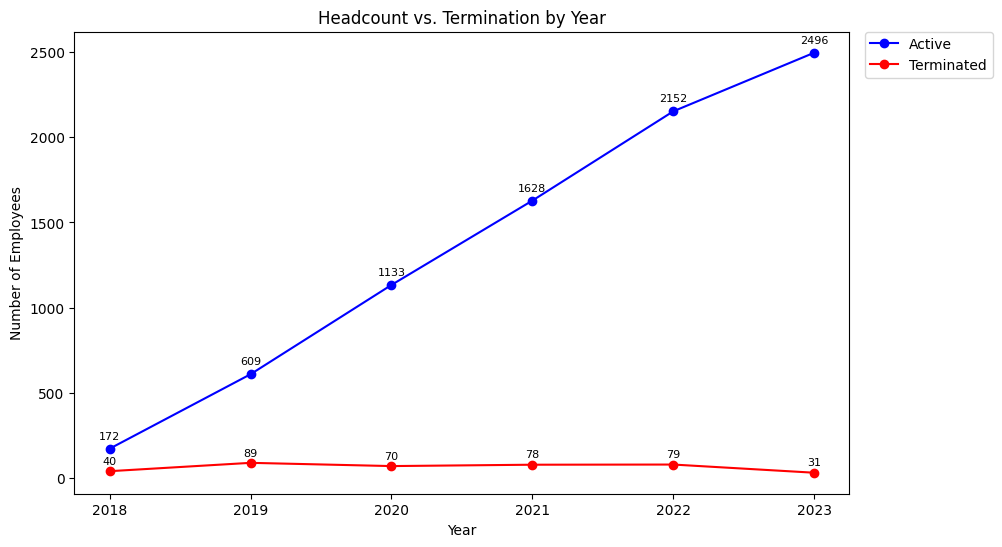

In [ ]:
# Visualizing active and terminated employee
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting data
ax.plot(emp_atre['Year'], emp_atre['Employee End'], label='Employee End', color='blue', marker='o')
ax.plot(emp_atre['Year'], emp_atre['Terminated Employee'], label='Terminated Employee', color='red', marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Employees')
ax.set_title('Headcount vs. Termination by Year')

ax.legend(title='', loc=2, labels=['Active', 'Terminated'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)

for i, txt in enumerate(emp_atre['Employee End']):
    ax.annotate(f'{int(txt)}', (emp_atre['Year'][i], emp_atre['Employee End'][i]), textcoords="offset points", xytext=(0,7), ha='center', fontsize=8, color='black')

for i, txt in enumerate(emp_atre['Terminated Employee']):
    ax.annotate(f'{int(txt)}', (emp_atre['Year'][i], emp_atre['Terminated Employee'][i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='black')

##### Employee Retention and Attrition Rate

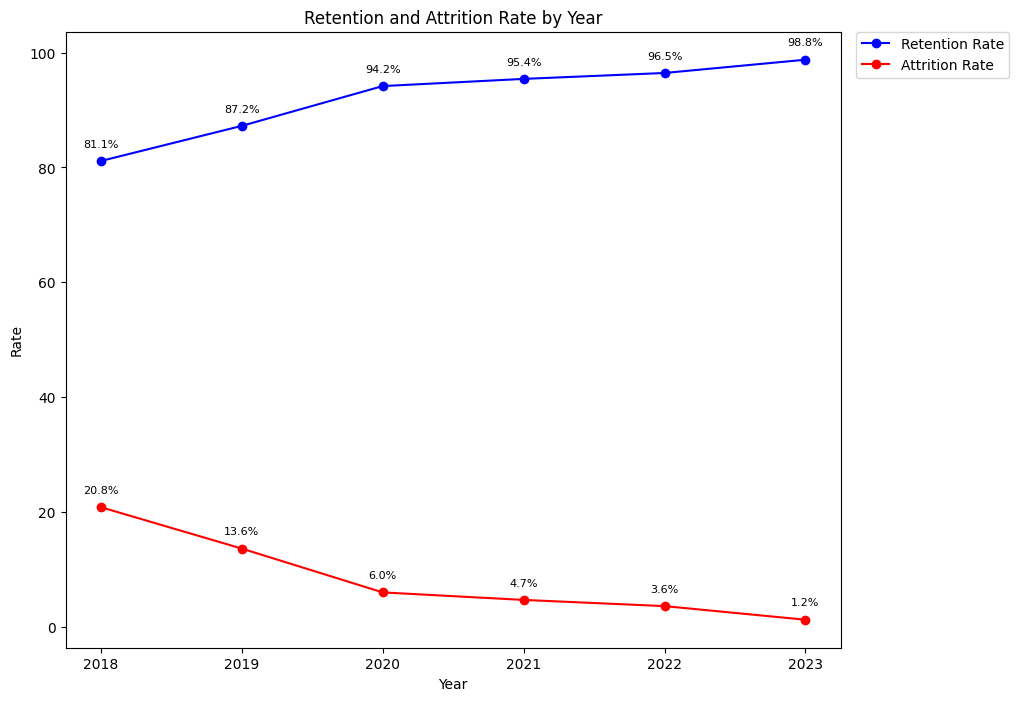

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting data
ax.plot(emp_atre['Year'], emp_atre['Retention Rate'], label='Retention Rate', color='blue', marker='o')
ax.plot(emp_atre['Year'], emp_atre['Attrition Rate'], label='Attrition Rate', color='red', marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Rate')
ax.set_title('Retention and Attrition Rate by Year')

ax.legend(title='', loc=2, labels=['Retention Rate', 'Attrition Rate'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)

for i, txt in enumerate(emp_atre['Retention Rate']):
    ax.annotate(f'{txt:.1f}%', (emp_atre['Year'][i], emp_atre['Retention Rate'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

for i, txt in enumerate(emp_atre['Attrition Rate']):
    ax.annotate(f'{txt:.1f}%', (emp_atre['Year'][i], emp_atre['Attrition Rate'][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

plt.show()